<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-SupervisedLearning_Regression/blob/main/usa_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/usa-real-estate-datase/realtor-data.zip.csv')

In [3]:
df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [4]:
df.shape

(1004966, 10)

In [5]:
print('df columns:', df.columns.tolist())

df columns: ['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date', 'price']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004966 entries, 0 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1004966 non-null  object 
 1   bed             864435 non-null   float64
 2   bath            882116 non-null   float64
 3   acre_lot        709920 non-null   float64
 4   city            1004891 non-null  object 
 5   state           1004966 non-null  object 
 6   zip_code        1004761 non-null  float64
 7   house_size      681682 non-null   float64
 8   prev_sold_date  505867 non-null   object 
 9   price           1004895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 76.7+ MB


In [7]:
df.isnull().sum().sort_values(ascending=False)

prev_sold_date    499099
house_size        323284
acre_lot          295046
bed               140531
bath              122850
zip_code             205
city                  75
price                 71
status                 0
state                  0
dtype: int64

In [8]:
((df.isnull().sum()/ len(df))*100).sort_values(ascending=False)

prev_sold_date    49.663272
house_size        32.168650
acre_lot          29.358804
bed               13.983657
bath              12.224294
zip_code           0.020399
city               0.007463
price              0.007065
status             0.000000
state              0.000000
dtype: float64

In [9]:
df.drop(columns=['prev_sold_date','zip_code','city','status'], axis=1 , inplace=True)

In [10]:
df.dropna(subset=['price'], inplace= True)

In [11]:
df = df[df.isna().sum(axis=1) < 2]

In [12]:
((df.isna().sum()/len(df))*100).sort_values(ascending=False)

acre_lot      24.684267
house_size    16.032249
bed            0.544618
bath           0.369277
state          0.000000
price          0.000000
dtype: float64

In [13]:
df.dropna(subset=['bed'] , inplace=True)
df.dropna(subset=['bath'] , inplace=True)

In [14]:
df['state'].value_counts()

New Jersey        206102
New York          190642
Massachusetts     148307
Connecticut        86094
New Hampshire      32171
Rhode Island       28194
Vermont            28121
Maine              24555
Puerto Rico        21241
Pennsylvania       15085
Delaware            1929
Virgin Islands       742
Georgia               48
West Virginia          5
Wyoming                3
Name: state, dtype: int64

In [15]:
df = df.groupby('state').filter(lambda x: len(x) >= 50)

In [16]:
df.shape

(783183, 6)

<Axes: xlabel='price'>

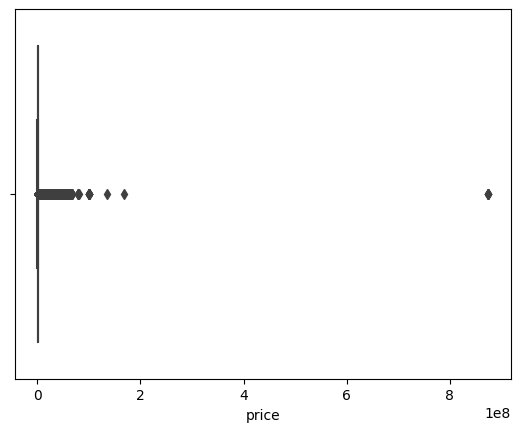

In [36]:
sns.boxplot(data = df , x = 'price')

<Axes: xlabel='house_size'>

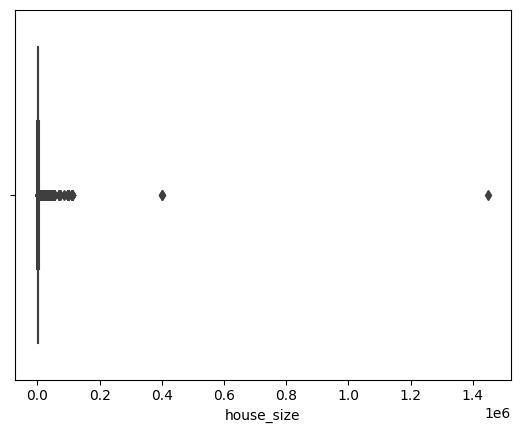

In [37]:
sns.boxplot(data = df , x = 'house_size')

<Axes: xlabel='acre_lot'>

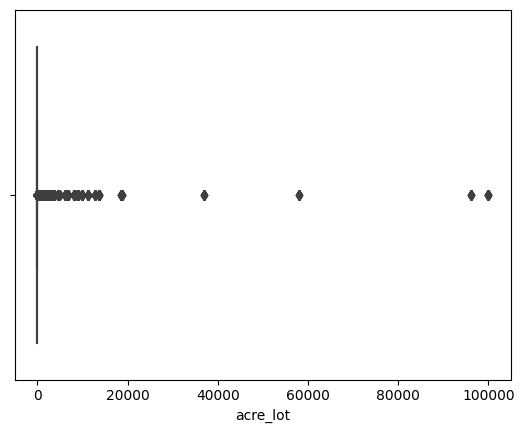

In [41]:
sns.boxplot( data = df , x= 'acre_lot')

<Axes: xlabel='bath'>

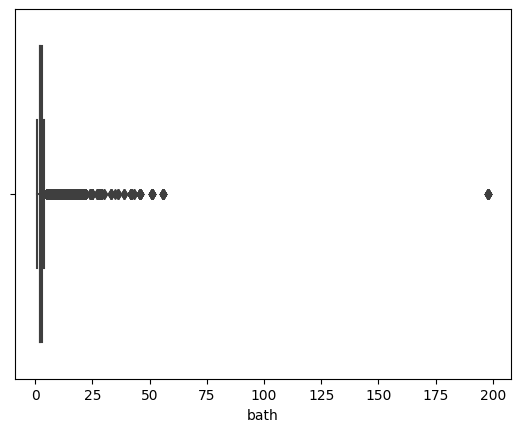

In [47]:
sns.boxplot( data = df , x= 'bath')

<Axes: xlabel='bed'>

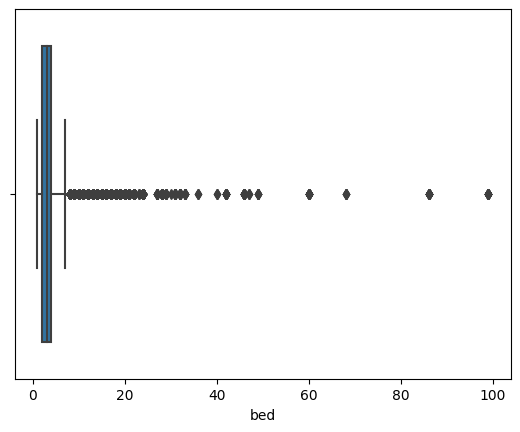

In [48]:
sns.boxplot( data = df , x= 'bed')

In [49]:
df = df[(df['price'] < 2000000 ) & (df['house_size'] <20000) & (df['acre_lot'] <20000) & (df['bath'] <20) & (df['bed'] <20)]

In [50]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New York', 'New Hampshire', 'Vermont',
       'Rhode Island', 'Maine', 'Pennsylvania', 'Delaware'], dtype=object)

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['state_numeric'] = label_encoder.fit_transform(df['state'])
df = df.drop("state", axis=1)
df

<ipython-input-51-0a827e942b0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state_numeric'] = label_encoder.fit_transform(df['state'])


,bed,bath,acre_lot,house_size,price,state_numeric
0,3.0,2.0,0.12,920.0,105000.0,8
1,4.0,2.0,0.08,1527.0,80000.0,8
2,2.0,1.0,0.15,748.0,67000.0,8
3,4.0,2.0,0.10,1800.0,145000.0,8
5,4.0,3.0,0.46,2520.0,179000.0,8
...,...,...,...,...,...,...
1004958,2.0,2.0,0.05,1337.0,505000.0,6
1004959,2.0,1.0,0.14,730.0,332500.0,6
1004960,3.0,2.0,0.11,1578.0,699000.0,6
1004962,3.0,2.0,0.14,1806.0,599000.0,6


In [52]:
numeric_to_state = {label: state for label, state in enumerate(label_encoder.classes_)}
# Print the mapping
print(numeric_to_state)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


In [53]:
df['acre_lot'].fillna(df['acre_lot'].mean(), inplace=True)
df['house_size'].fillna(df['house_size'].mean(), inplace=True)

In [54]:
df.isna().sum()

bed              0
bath             0
acre_lot         0
house_size       0
price            0
state_numeric    0
dtype: int64

In [55]:
df.shape

(431789, 6)

In [56]:
df.head(10)

,bed,bath,acre_lot,house_size,price,state_numeric
0,3.0,2.0,0.12,920.0,105000.0,8
1,4.0,2.0,0.08,1527.0,80000.0,8
2,2.0,1.0,0.15,748.0,67000.0,8
3,4.0,2.0,0.10,1800.0,145000.0,8
5,4.0,3.0,0.46,2520.0,179000.0,8
6,3.0,1.0,0.20,2040.0,50000.0,8
7,3.0,2.0,0.08,1050.0,71600.0,8
8,2.0,1.0,0.09,1092.0,100000.0,8
9,5.0,3.0,7.46,5403.0,300000.0,8
10,3.0,2.0,13.39,1106.0,89000.0,8


In [57]:
df.dtypes

bed              float64
bath             float64
acre_lot         float64
house_size       float64
price            float64
state_numeric      int64
dtype: object

<Axes: xlabel='price'>

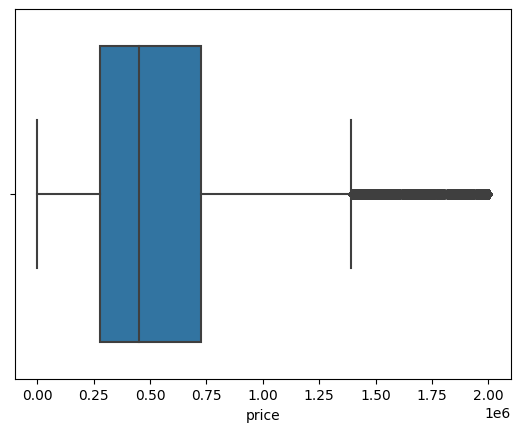

In [58]:
sns.boxplot(data = df , x='price')

<Axes: xlabel='price', ylabel='Count'>

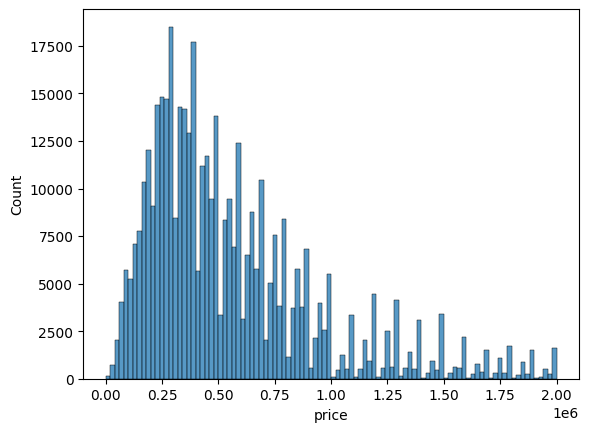

In [59]:
sns.histplot(df['price'] , bins= 100 )

<Axes: xlabel='house_size'>

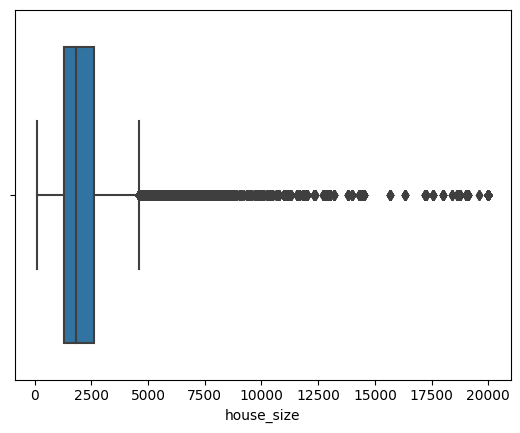

In [60]:
sns.boxplot(data = df , x='house_size')

<Axes: xlabel='house_size', ylabel='Count'>

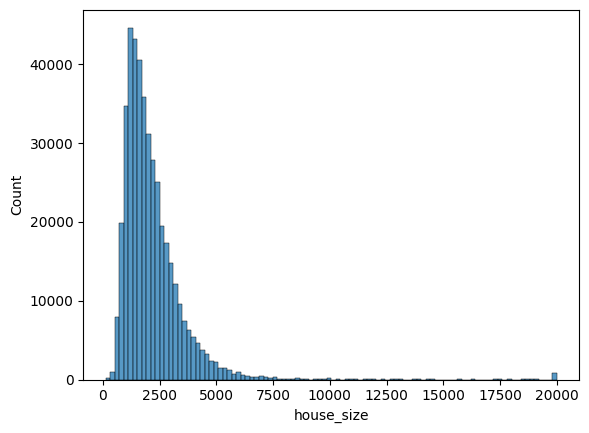

In [61]:
sns.histplot(df['house_size'] , bins= 100 )

<Axes: xlabel='bed'>

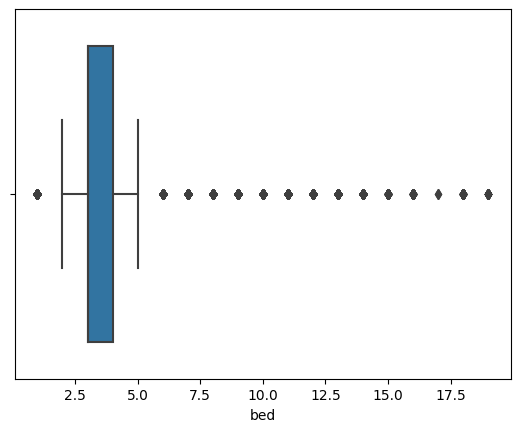

In [62]:
sns.boxplot(data = df , x='bed')

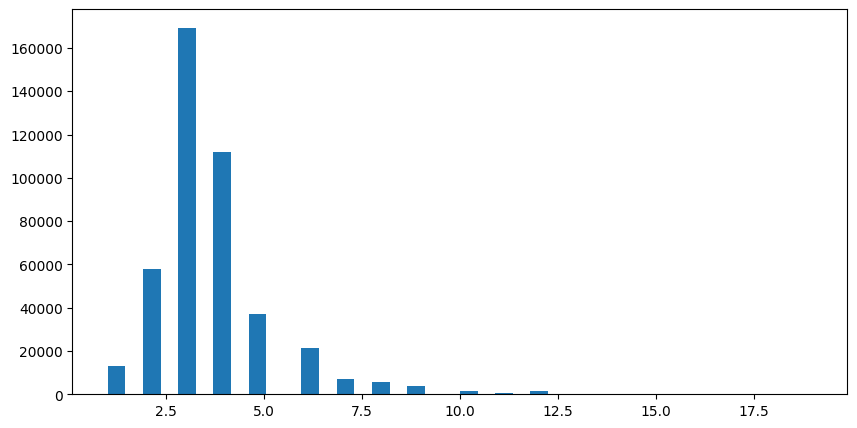

In [63]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= df['bed'], bins=40)
plt.show()

In [64]:
df.columns

Index(['bed', 'bath', 'acre_lot', 'house_size', 'price', 'state_numeric'], dtype='object')

In [65]:
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder,StandardScaler

In [66]:
scaler = MinMaxScaler()
df[['bed', 'bath','house_size','price','acre_lot']] = scaler.fit_transform(df[['bed', 'bath','house_size','price','acre_lot']])

In [67]:
df_encoded = pd.get_dummies(df, columns=['state_numeric'])

In [68]:
df_encoded

,bed,bath,acre_lot,house_size,price,state_numeric_0,state_numeric_1,state_numeric_2,state_numeric_3,state_numeric_4,state_numeric_5,state_numeric_6,state_numeric_7,state_numeric_8,state_numeric_9,state_numeric_10,state_numeric_11
0,0.111111,0.0625,0.000006,0.040149,0.052263,0,0,0,0,0,0,0,0,1,0,0,0
1,0.166667,0.0625,0.000004,0.070688,0.039760,0,0,0,0,0,0,0,0,1,0,0,0
2,0.055556,0.0000,0.000008,0.031495,0.033258,0,0,0,0,0,0,0,0,1,0,0,0
3,0.166667,0.0625,0.000005,0.084423,0.072268,0,0,0,0,0,0,0,0,1,0,0,0
5,0.166667,0.1250,0.000024,0.120648,0.089272,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004958,0.055556,0.0625,0.000003,0.061129,0.252313,0,0,0,0,0,0,1,0,0,0,0,0
1004959,0.055556,0.0000,0.000007,0.030590,0.166042,0,0,0,0,0,0,1,0,0,0,0,0
1004960,0.111111,0.0625,0.000006,0.073254,0.349338,0,0,0,0,0,0,1,0,0,0,0,0
1004962,0.111111,0.0625,0.000007,0.084725,0.299325,0,0,0,0,0,0,1,0,0,0,0,0


In [69]:
df= df_encoded.copy()

In [70]:
X = df.drop('price', axis=1)  # features
y = df['price']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
reg = LinearRegression()

In [75]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [76]:
reg.score(xtest,ytest)

0.424945901947659

In [77]:
reg.coef_

array([-1.55953576e-01,  1.14340202e+00,  5.85200349e-02,  4.64448290e-01,
        9.30191269e+11,  9.30191269e+11,  9.30191269e+11,  9.30191269e+11,
        9.30191269e+11,  9.30191269e+11,  9.30191269e+11,  9.30191269e+11,
        9.30191269e+11,  9.30191269e+11,  9.30191269e+11,  9.30191269e+11])